# Описание проекта

Необходимо сделать предварительный анализ тарифов мобильного оператора на небольшой выборке клиентов. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Прочтём все данные и сохраним в переменные:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
# Используем метод info и describe чтобы изучить информацию по исходным данным:
df_calls.info()
df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [4]:
# Выведем первые 10 строк с исходными данными для наглядности:
print(df_calls.head(10))

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
5  1000_5  2018-11-02      0.00     1000
6  1000_6  2018-10-18      0.00     1000
7  1000_7  2018-08-22     18.31     1000
8  1000_8  2018-09-15     18.44     1000
9  1000_9  2018-08-15      0.00     1000


#### Заключение по данным со звонками клиентов:

В исходных данных по звонкам отсутствуют пропуски, но надо будет поменять формат для даты

In [5]:
# Используем метод info и describe чтобы изучить информацию по исходным данным:
df_internet.info()
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [6]:
# Выведем первые 10 строк с исходными данными для наглядности:
print(df_internet.head(10))

   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000
5           5  1000_5   399.97   2018-10-02     1000
6           6  1000_6   540.08   2018-09-07     1000
7           7  1000_7   415.70   2018-07-11     1000
8           8  1000_8   505.40   2018-10-08     1000
9           9  1000_9   345.54   2018-09-03     1000


#### Заключение по данным с интернет-трафиком клиентов:

В данных присутствует столбец Unnamed, который дублирует индекс таблицы по строкам. Отсутствуют пропуски в данных, необходимо поменять формат для даты.

In [7]:
# Используем метод info и describe чтобы изучить информацию по исходным данным:
df_messages.info()
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [8]:
# Выведем первые 10 строк с исходными данными для наглядности:
print(df_messages.head(10))

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000
5  1000_5   2018-06-20     1000
6  1000_6   2018-11-19     1000
7  1000_7   2018-10-29     1000
8  1000_8   2018-06-25     1000
9  1000_9   2018-12-18     1000


#### Заключение по данным с сообщениями:

Отсутствуют пропуски, необходимо поменять формат для даты.

In [9]:
# Используем метод info и describe чтобы изучить информацию по исходным данным:
df_tariffs.info()
df_tariffs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [10]:
# Выведем данные по тарифам:
print(df_tariffs)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  


#### Заключение по данным с описанием тарифов:

Данные в порядке.

In [11]:
# Используем метод info и describe чтобы изучить информацию по исходным данным:
df_users.info()
df_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [12]:
# Выведем первые 10 строк с исходными данными для наглядности:
print(df_users.head(10))

   user_id  age churn_date              city first_name  last_name  \
0     1000   52        NaN         Краснодар     Рафаил  Верещагин   
1     1001   41        NaN            Москва       Иван       Ежов   
2     1002   59        NaN       Стерлитамак    Евгений  Абрамович   
3     1003   23        NaN            Москва      Белла   Белякова   
4     1004   68        NaN       Новокузнецк    Татьяна   Авдеенко   
5     1005   67        NaN  Набережные Челны   Афанасий     Горлов   
6     1006   21        NaN         Ульяновск     Леонид   Ермолаев   
7     1007   65        NaN            Москва        Юна   Березина   
8     1008   63        NaN         Челябинск     Рустэм  Пономарёв   
9     1009   24        NaN             Пермь   Василиса    Блинова   

     reg_date tariff  
0  2018-05-25  ultra  
1  2018-11-01  smart  
2  2018-06-17  smart  
3  2018-08-17  ultra  
4  2018-05-14  ultra  
5  2018-01-25  smart  
6  2018-02-26  smart  
7  2018-04-19  smart  
8  2018-12-19  smart  

#### Заключение по данным с информацией о клиентах:

Данные содержат пропуски в столбце churn_date (дата прекращения пользования тарифом). Пропуски в данным случае означают, что клиент действующий и продолжает пользоваться услугами мобильного оператора. Необходимо изменить формат для даты в столбце reg_date.

### Подготовьте данные:

In [13]:
# Поменяем формат даты во всех таблицах с данными:

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [14]:
# Вызовем метод unique чтобы посмотреть уникальные значение для столбца "Unnamed: 0":
df_internet['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 149393, 149394, 149395])

In [15]:
# Удалим столбец "Unnamed: 0" так как он дублирует индекс строк:
df_internet.drop('Unnamed: 0', axis='columns', inplace=True)

In [16]:
# Убедимся, что столбец "Unnamed: 0" исчез из наших данных:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [17]:
# Удалим из таблицы со звонками те строки, где длительность звонка была 0 секунд:
df_calls = df_calls.loc[df_calls.ne(0).all(axis=1)]

In [18]:
# Добавим столбец, в котором будет указан месяц совершения звонка:
df_calls['month'] = df_calls['call_date'].dt.month_name()

In [19]:
# Сохраним в новую сводную таблицу количество звонков для каждого клиента, совершённые в разные месяцы:
count_calls_in_month = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'count')

In [20]:
# Сохраним в новую сводную таблицу суммарную длительность звонков для каждого клиента, совершённые в разные месяцы:
total_duration_calls_in_month = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')

In [21]:
# Добавим столбец, в котором будет указан месяц отправки сообщения:
df_messages['month'] = df_messages['message_date'].dt.month_name()

In [22]:
# Сохраним в новую сводную таблицу количество смс для каждого клиента, отправленных в разные месяцы:
messages_in_month = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')

In [23]:
# Добавим столбец, в котором будет указан месяц, в котором была интернет-сессия:
df_internet['month'] = df_internet['session_date'].dt.month_name()

In [24]:
# Сохраним в новую сводную таблицу суммарный объём интернет-трафика, потраченного каждым клиентом в разные месяцы:
mb_used_in_month = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')

In [25]:
# Объединим по 'user_id' и 'month' наши сводные таблицы при помощи метода merge:
df = count_calls_in_month.merge(total_duration_calls_in_month, on=['user_id', 'month'], how='outer')
df = df.merge(messages_in_month, on=['user_id', 'month'], how='outer')
df = df.merge(mb_used_in_month, on=['user_id', 'month'], how='outer')

In [26]:
# Переимунем название столбцов:
df.rename(columns={'duration_x': 'count_calls', 'duration_y': 'duration_calls', 'id': 'count_messages'}, inplace=True)

In [27]:
# Объединям полученную таблицу с df_users:
df = df.merge(df_users, on='user_id', how='outer')

In [28]:
# Переименуем столбец tariff_name в tariff чтобы можно было сделать объединение:
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

# Объединям полученную таблицу с df_tariffs:
df = df.merge(df_tariffs, on='tariff', how='outer')
print(df)

      user_id  count_calls  duration_calls  count_messages   mb_used  age  \
0        1000         42.0          389.87            81.0  14055.93   52   
1        1000         38.0          312.98            70.0   9817.61   52   
2        1000         41.0          318.80            75.0  14003.64   52   
3        1000         28.0          158.90            60.0  23233.77   52   
4        1000         17.0          150.06            22.0   2253.49   52   
...       ...          ...             ...             ...       ...  ...   
3211     1489          NaN             NaN            35.0  17322.51   35   
3212     1489          NaN             NaN            20.0  17491.56   35   
3213     1489          NaN             NaN            21.0  19559.44   35   
3214     1489          NaN             NaN            32.0  17206.30   35   
3215     1371          NaN             NaN             NaN       NaN   50   

     churn_date             city first_name  last_name   reg_date tariff  \

In [50]:
df.user_id.nunique()

500

In [51]:
df.shape

(3216, 20)

In [29]:
# Заполним все пропуски в нашей итоговой таблице нулевыми значениями:
df = df.fillna(0)

In [30]:
# Округлим значения в столбцах duration_calls и mb_used до ближайшего целого в большую сторону:
df['duration_calls'] = np.ceil(df['duration_calls'])
df['mb_used'] = np.ceil(df['mb_used'])

In [31]:
# Напишем функцию, которая нам посчитает помесячную выручку для каждого клиента:
total = 0

def additional_fee(df):
    total = df['rub_monthly_fee']
    if df['minutes_included'] - df['duration_calls'] <= 0:
        total += df['rub_per_minute'] * (df['duration_calls'] - df['minutes_included'])
    if df['messages_included'] - df['count_messages'] <= 0:
        total += df['rub_per_message'] * (df['count_messages'] - df['messages_included'])
    if df['mb_per_month_included'] - df['mb_used'] <= 0:
        total += df['rub_per_gb'] * ((df['mb_used'] - df['mb_per_month_included']) / 1024)
    return total    

In [32]:
# Применим нашу функцию ко всей таблице с данными:
df['total_income'] = df.apply(additional_fee, axis = 1)
print(df)

      user_id  count_calls  duration_calls  count_messages  mb_used  age  \
0        1000         42.0           390.0            81.0  14056.0   52   
1        1000         38.0           313.0            70.0   9818.0   52   
2        1000         41.0           319.0            75.0  14004.0   52   
3        1000         28.0           159.0            60.0  23234.0   52   
4        1000         17.0           151.0            22.0   2254.0   52   
...       ...          ...             ...             ...      ...  ...   
3211     1489          0.0             0.0            35.0  17323.0   35   
3212     1489          0.0             0.0            20.0  17492.0   35   
3213     1489          0.0             0.0            21.0  19560.0   35   
3214     1489          0.0             0.0            32.0  17207.0   35   
3215     1371          0.0             0.0             0.0      0.0   50   

               churn_date             city first_name  last_name   reg_date  \
0       

In [52]:
df["total_income"].describe()

count    3216.000000
mean     1462.088350
std       777.986421
min       550.000000
25%       658.000000
50%      1515.093750
75%      1950.000000
max      6543.882812
Name: total_income, dtype: float64

#### Вывод о подготовке данных:

В исходных данных мы привели дату в необходимый формат. Удалили звонки, длительность которых составляла 0 секунд, чтобы в дальнейшем эти звонки не влияли на расчёт средней длительности звонка. Удалили столбец Unnamed из таблицы с данными по трафику, так как он дублировал индекс таблицы. Сделали группировку всех таблиц по user id и месяцам и объединили их в одну, для подсчёта помесячной выручки с каждого клиента.

### Проанализируйте данные

In [33]:
# Посчитаем среднее, дисперсию и стандартное отклонение для каждого из тарифов:
df_grouped_by_tariff = df.groupby('tariff')['duration_calls', 'count_messages', 'mb_used'].agg(['mean', 'var', 'std'])
print(df_grouped_by_tariff)

       duration_calls                           count_messages               \
                 mean           var         std           mean          var   
tariff                                                                        
smart      394.745291  32448.311945  180.134150      33.369058   796.955256   
ultra      497.042596  90117.460113  300.195703      49.313387  2285.417425   

                        mb_used                              
              std          mean           var           std  
tariff                                                       
smart   28.230396  16201.604933  3.456492e+07   5879.193556  
ultra   47.806040  19449.562880  1.020327e+08  10101.123352  


In [34]:
# Сгруппируем наши данные в два датасета в зависимости от используемого тарифа:
data1 = df.query('tariff == "ultra"')
data2 = df.query('tariff == "smart"')

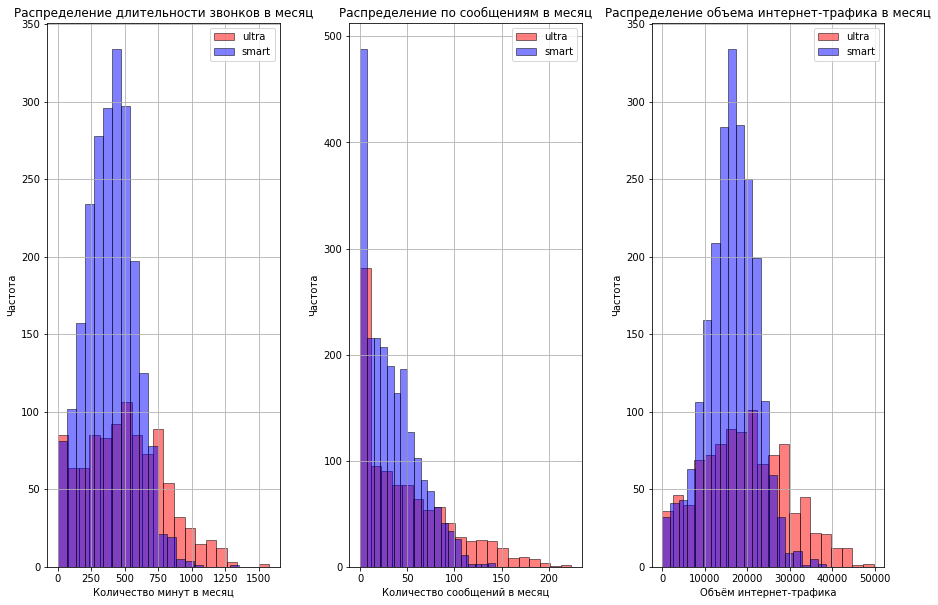

In [35]:
# Построим гистограммы распределения количетсва используемых минут, сообщений и интернет-трафика:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 10))

axes[0].set_ylabel('Частота')
axes[0].set_xlabel('Количество минут в месяц')
axes[0].set_title('Распределение длительности звонков в месяц')
axes[0].hist(data1['duration_calls'],
                bins=20, 
                alpha=0.5, 
                ec='black',
                color='red',
                )
axes[0].hist(data2['duration_calls'],
                bins=20, 
                alpha=0.5, 
                ec='black',
                color='blue',
                )
axes[0].legend(labels=['ultra', 'smart'])
axes[0].grid()

axes[1].set_ylabel('Частота')
axes[1].set_xlabel('Количество сообщений в месяц')
axes[1].set_title('Распределение по сообщениям в месяц')
axes[1].hist(data1['count_messages'],
                bins=20, 
                alpha=0.5, 
                ec='black',
                color='red',
                )
axes[1].hist(data2['count_messages'],
                bins=20, 
                alpha=0.5, 
                ec='black',
                color='blue',
                )
axes[1].legend(labels=['ultra', 'smart'])
axes[1].grid()

axes[2].set_ylabel('Частота')
axes[2].set_xlabel('Объём интернет-трафика')
axes[2].set_title('Распределение объема интернет-трафика в месяц')
axes[2].hist(data1['mb_used'],
                bins=20, 
                alpha=0.5, 
                ec='black',
                color='red',
                )
axes[2].hist(data2['mb_used'],
                bins=20, 
                alpha=0.5, 
                ec='black',
                color='blue',
                )
axes[2].legend(labels=['ultra', 'smart'])
axes[2].grid()

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

#### Вывод:

Из получившихся гистограмм можно сделать вывод, что все наши датасеты имеют скошенность влево. Ближе всего к симметричному распределению данные с объёмом трафика, но и там наблюдается скошенность влево. Из гистограммы распределение сообщений видно, что многие клиенты не пользутся смс сообщениями. Можно сделать вывод, что клиенты стараются больше использовать мессенжеры для отправки сообщений и звонков, которые используют интернет, а не расходуют пакеты минут и смс сообщений.

### Проверка гипотез

#### Формулируем нулевые гипотезы:

Нулевая гипотеза №1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.
Нулевая гипотеза №2: Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

#### Формулируем альтернативные гипотезы:

Альетрнативная гипотеза №1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Альтернативная гипотеза №2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

count     986.000000
mean     2059.768200
std       354.738109
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4737.011719
Name: total_income, dtype: float64


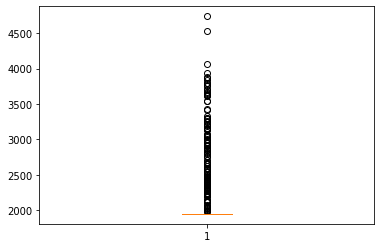

In [36]:
# Посмотрим характеристики столбца total_income для тарифа ultra, построим boxplot чтобы посмотреть наличие выбросов:
print(data1['total_income'].describe())
plt.boxplot(data1['total_income'])
plt.show()

count    2230.000000
mean     1197.822730
std       767.794292
min       550.000000
25%       550.000000
50%       925.390625
75%      1602.812500
max      6543.882812
Name: total_income, dtype: float64


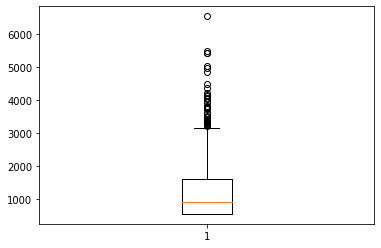

In [37]:
# Посмотрим характеристики столбца total_income для тарифа smart, построим boxplot чтобы посмотреть наличие выбросов:
print(data2['total_income'].describe())
plt.boxplot(data2['total_income'])
plt.show()

In [38]:
# Удалим из нашей выборки выбросы, которые не попадают в интервал от -2.7 сигма до 2.7 сигма:
q1 = data1['total_income'].quantile(0.25) # сохраним значение первого квартиля в переменную
q3 = data1['total_income'].quantile(0.75) # сохраним значение третьего квартиля в переменную
iqr = q3 - q1 # Интерквартильный размах
data1 = data1.loc[(data1['total_income'] >= (q1 - 1.5 * iqr)) & (data1['total_income'] <= (q3 + 1.5 * iqr))]
print(data1['total_income'].describe()) # применим describe к требуемому столбцу, чтобы видеть его характеристики

count     852.0
mean     1950.0
std         0.0
min      1950.0
25%      1950.0
50%      1950.0
75%      1950.0
max      1950.0
Name: total_income, dtype: float64


In [39]:
# Удалим из нашей выборки выбросы, которые не попадают в интервал от -2.7 сигма до 2.7 сигма:
q1 = data2['total_income'].quantile(0.25) # сохраним значение первого квартиля в переменную
q3 = data2['total_income'].quantile(0.75) # сохраним значение третьего квартиля в переменную
iqr = q3 - q1 # Интерквартильный размах
data2 = data2.loc[(data2['total_income'] >= (q1 - 1.5 * iqr)) & (data2['total_income'] <= (q3 + 1.5 * iqr))]
print(data2['total_income'].describe()) # применим describe к требуемому столбцу, чтобы видеть его характеристики

count    2187.000000
mean     1143.849148
std       662.611867
min       550.000000
25%       550.000000
50%       909.375000
75%      1563.218750
max      3170.312500
Name: total_income, dtype: float64


In [40]:
alpha = 0.05 # критический уровень статистической значимости

In [41]:
# Применим Т-тест 
results_1 = st.ttest_ind(data1['total_income'], data2['total_income'], equal_var = True)

In [42]:
print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.6646210399461705e-231
Отвергаем нулевую гипотезу


In [43]:
# Создаем два новых среза из наших данных, в одном из которых будут данные по Москве, а в другом - все остальные города
data3 = df.query('city == "Москва"')
data4 = df.query('city != "Москва"')

count     611.000000
mean     1485.405588
std       737.633214
min       550.000000
25%       698.820312
50%      1638.250000
75%      1950.000000
max      5043.226562
Name: total_income, dtype: float64


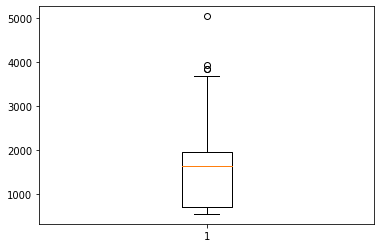

In [44]:
# Посмотрим характеристики столбца total_income для Москвы, построим boxplot чтобы посмотреть наличие выбросов:
print(data3['total_income'].describe())
plt.boxplot(data3['total_income'])
plt.show()

count    2605.000000
mean     1456.619316
std       787.187954
min       550.000000
25%       655.000000
50%      1471.820312
75%      1950.000000
max      6543.882812
Name: total_income, dtype: float64


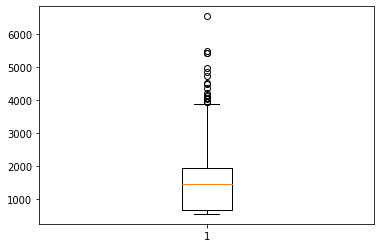

In [45]:
# Посмотрим характеристики столбца total_income для других городов, построим boxplot чтобы посмотреть наличие выбросов:
print(data4['total_income'].describe())
plt.boxplot(data4['total_income'])
plt.show()

In [46]:
# Удалим из нашей выборки выбросы, которые не попадают в интервал от -2.7 сигма до 2.7 сигма:
q1 = data3['total_income'].quantile(0.25) # сохраним значение первого квартиля в переменную
q3 = data3['total_income'].quantile(0.75) # сохраним значение третьего квартиля в переменную
iqr = q3 - q1 # Интерквартильный размах
data3 = data3.loc[(data3['total_income'] >= (q1 - 1.5 * iqr)) & (data3['total_income'] <= (q3 + 1.5 * iqr))]
print(data3['total_income'].describe()) # применим describe к требуемому столбцу, чтобы видеть его характеристики

count     607.000000
mean     1467.760956
std       705.934064
min       550.000000
25%       697.320312
50%      1627.343750
75%      1950.000000
max      3694.189453
Name: total_income, dtype: float64


In [47]:
# Удалим из нашей выборки выбросы, которые не попадают в интервал от -2.7 сигма до 2.7 сигма:
q1 = data4['total_income'].quantile(0.25) # сохраним значение первого квартиля в переменную
q3 = data4['total_income'].quantile(0.75) # сохраним значение третьего квартиля в переменную
iqr = q3 - q1 # Интерквартильный размах
data4 = data4.loc[(data4['total_income'] >= (q1 - 1.5 * iqr)) & (data4['total_income'] <= (q3 + 1.5 * iqr))]
print(data4['total_income'].describe()) # применим describe к требуемому столбцу, чтобы видеть его характеристики

count    2586.000000
mean     1433.547707
std       740.091406
min       550.000000
25%       651.529297
50%      1458.625000
75%      1950.000000
max      3885.351562
Name: total_income, dtype: float64


In [48]:
# Применим Т-тест
results_2 = st.ttest_ind(data3['total_income'], data4['total_income'], equal_var = True)

In [49]:
print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3012718782795918
Не получилось отвергнуть нулевую гипотезу


#### Вывод:

Проверка гипотез показала, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, а средняя выручка пользователей из Москвы не сильно отличается от средней выручке пользователей из других регионов.

### Общий вывод:

В данном проекте мы проанализировали выборку клиентов сотовой компании, которые пользуются двумя разными тарифами: Смарт и Ультра. Около 30% клиентов выбирают тариф Ультра и практически все укладыавются в включенные лимиты тарифы по минутам, смс сообещениям и интернет-трафику. Не смотря на то, что 70% клиентов выбирают тариф Смарт, выручка с таких клиентов практически в 2 раза ниже, чем с клиентов с тарифом Ультра. Средняя выручка с клиентов на этих двух тарифах различается значимо. В то же время, выручка с одного клиента, в среднем, никак не зависит от региона, в котором клиент пользуется услугами мобильного оператора. Так же в ходе нашего исследования, мы выяснили, что многие клиенты делают акцент в использовании мобильного интернета вместо использования смс-сообщений и звонков. Возможно стоит пересмотреть количество включённых смс сообщений в пакет, так как многие клиенты ими не пользуются. 